# 환경에 따른 주택 가격 예측하기
## 데이터 수집, 준비 및 탐색

In [1]:
import pandas as pd
import numpy as np

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None, engine="python")
# "\s+": 사이트에서 한칸 이상의 공백으로 데이터가 구분되어있어서 \s+로 빈칸기준으로 데이터분리
# skiprows=22 : 앞의 설명부분인 22줄 건너뜀

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# 데이터가 두줄씩 있기에(두줄이 한세트의 데이터), 짝수줄과 홀수줄을 따로 추출한 후 필요한 부분만 가져와서 합칠거임
# [::2, :] > 0번째 줄부터 2칸씩 건너뛰며 받아옴. 
# 즉, 짝수줄(0번째, 2번째, 4번째,,,줄)을 그대로 받아옴. 

# [1::2, :2] > 1번째 줄부터 2칸씩 건너뛰며 받아옴. 
# 즉, 홀수줄(1번째, 3번째, 5번째,,,,줄)을 받아옴. 
# 근데 데이터를 가져올 때 앞에서 2개의 데이터만 가져와라(:2)  
#
# -> 각각 자른걸 np.hstack로 두 데이터를 합침

target = raw_df.values[1::2, 2]
# target [1::2,2] >홀수줄의 세번째 칸에 들어가있는 값이라 이것만 뽑아서 가져옴

In [4]:
boston_df =pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
# 독립 변수 X가 되는 피처들을 DataFrame 자료형으로 변환하여 boston_df를 생성

boston_df['PRICE'] = target
# 종속 변수인 주택 가격(‘PRICE’) 컬럼을 boston_df에 추가 
# (*타겟데이터를 표 맨끝으로)
# 사실 비효율적인 작업이다. 괜히 한번 떼었다가 다시 붙이는 과정

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
print('보스톤 주택 가격 데이터셋 크기: ', boston_df.shape)
# 데이터셋의 형태 boston_df.shape, 즉 행의 개수(데이터 개수)와 열의 개수(변수 개수)를 확인

# 결과 : 행의 개수가 506이므로 데이터가 506개 있으며, 열의 개수가 14이므로 변수가 14개 있음

보스톤 주택 가격 데이터셋 크기:  (506, 14)


In [ ]:
boston_df.info()
# 변수 중에서 13개 (0부터 12까지)는 독립 변수 X가 되고, 
# 마지막 변수 ‘PRICE’는 종속 변수 Y가 됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 선형회귀를 이용해 분석모델 구축

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# 사이킷런의 선형 분석 모델 패키지sklearn.linear_model에서 
# 선형 회귀LinearRegression를 이용하여 분석 모델을 구축

In [9]:
### X, Y 분할하기
Y = boston_df['PRICE'] 
# PRICE 피처를 회귀식의 종속 변수 Y로 설정하고 
X = boston_df.drop(['PRICE'], axis = 1, inplace = False) 
# PRICE를 제외 drop( )한 나머지 피처를 독립 변수 X로 설정

### 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 156)
# X와 Y 데이터 506개를 학습 데이터와 평가 데이터로 7:3 비율로 분할test_size=0.3
# random_state = 156 : 값이 편향될 수 있기에 데이터를 섞는 과정. 156번 방식으로 섞겠다

In [ ]:
#선형 회귀 분석 : 모델 생성 -> 최소자승법(OLS)이용
lr = LinearRegression()
# 선형 회귀 분석 모델 객체 lr을 생성
# 최소자승법(OLS : Ordinary Least Squares)사용 
# (특별한 기준 설정안하면 알아서 OLS로 계산해줌)
# 잔차를 최소화하는 모수를 찾음. 잔차하고 기울기가 최솟값이 되는 그 부분을 찾음 

In [11]:
#선형 회귀 분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [12]:
#선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

### [선형 회귀 분석 모델을 평가 지표를 통해 평가하고 회귀 계수를 확인하여 피처의 영향을 분석]

In [ ]:
# 평가 지표 MSE(평균 제곱 오차, mean squared error) 구하기
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse) # 구한 값의 제곱근을 계산해서 평가 지표 RMSE(평균 제곱근 편차)를 구함
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse)) 

MSE : 17.297, RMSE : 4.159


In [ ]:
# 평가 지표 R2 을 구함r2_score( )
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

# 결정계수(R^2)의 값은 0에서 1사이, 종속변수과 독립변수사이에 상관관계가 높을수록 1에 가까워짐

R^2(Variance score) : 0.757


In [ ]:
print('Y 절편 값: ', lr.intercept_)
# 선형 회귀의 Y절편 lr.intercept_과 각 피처의 회귀 계수 lr.coef_를 확인
# 이 결과로 y햇(예측y값)에 대한 일차함수 만들 수 있음

Y 절편 값:  40.995595172164506


In [ ]:
print('회귀 계수 값: ', np.round(lr.coef_, 1))
# 이 결과로 y햇(예측y값)에 대한 일차함수 만들 수 있음

회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns) # 데이터프레임 x의 컬럼명을 끌어옴.
coef.sort_values(ascending = False)
# 회귀 모델에서 구한 회귀 계수 값lr.coef_과 피처 이름X.columns을 묶어서 Series 자료 형으로 만들고, 
# 회귀 계수 값을 기준으로 내림차순으로 정렬하여 ascending=False 확인sort_ values( )

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

**결과**
- -19.8의 가중치를 가지는 NOX가 중요한 요인이라는 것을 확인할 수 있음
- 그냥 위에서 구한거를 보기 좋게 다시 보여주는 부분임. 
- 회귀 모델 결과를 토대로 보스톤 주택 가격에 대한 회귀식 작성 : 
YPRICE = -0.11XCRIM + 0.07XZN + 0.03XINDUS + 3.05XCHAS – 19.80XNOX + 3.35XRM + 0.01XAGE - 1.74XDIS + 0.36XRAD - 0.01XTAX - 0.92XPTRATIO + 0.01XB - 0.57XLSTAT + 41.00(절편값)


## 회귀분석 결과를 산점도 + 선형회귀그래프로 시각화

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

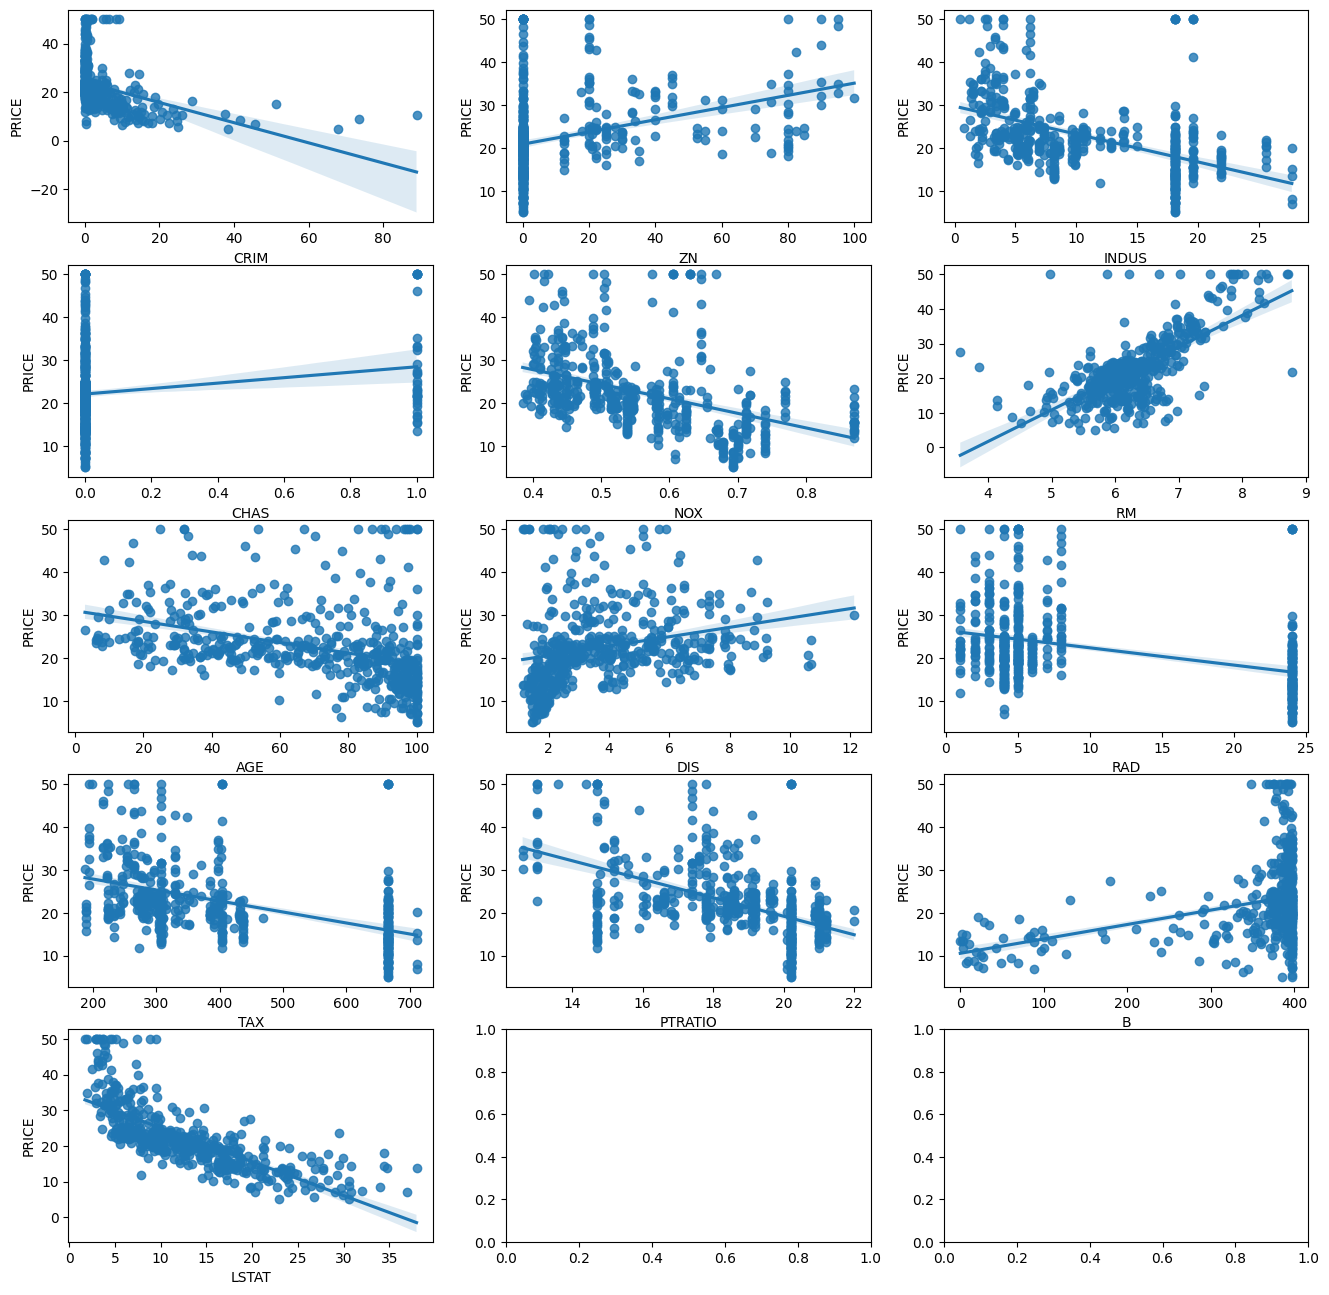

In [ ]:
fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 5)
# 독립 변수인 13개 피처와 종속 변수인 주택 가격, PRICE와의 회귀 관계를 보여주는 13개 그래프를 
# subplots()를 사용하여 5행 3열 구조로 모아서 나타냄 (가로3x세로5짜리 그래프) (x_feature : 각 그래프의 제목)

x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, feature in enumerate(x_features):
   row = int(i/3)
   col = i%3
   sns.regplot(x = feature, y = 'PRICE', data = boston_df, ax = axs[row][col])
   # aborn의 regplot()은 산점도 그래프와 선형 회귀 그래프를 함께 그려줌
   # row : index를 3으로 나눈 값을 정수형으로 바꿈 / 컬럼 : 3으로 나눴을 때 나머지 값 -> 이렇게 for문을 이용해서 3x5로 그려줌


### [1. 그래프에서 주목해야 할 사항]
✅ (1) 강한 양의 상관관계 (Positive Correlation)  
RM (방 개수): PRICE와 가장 강한 양의 상관관계를 보임.  
→ 방 개수가 많을수록 집값이 상승하는 경향이 명확함.  
→ 회귀선이 우상향하며, 데이터 점들이 선형적으로 정렬되는 모습.  
<br>
✅ (2) 강한 음의 상관관계 (Negative Correlation)  
LSTAT (저소득층 비율): PRICE와 강한 음의 상관관계를 보임.  
    → 저소득층 비율이 높을수록 주택 가격이 낮아지는 경향.   
    → 회귀선이 우하향하며, 데이터가 선형적으로 분포됨.  
<br>
CRIM (범죄율): PRICE와 음의 상관관계를 가짐.  
    → 범죄율이 높을수록 주택 가격이 낮아지는 경향.  
    → 다만, 데이터의 분포가 퍼져 있어서 완벽한 선형 관계는 아님.  
<br>
✅ (3) 중간 정도의 음의 상관관계  
NOX (공기 오염도): PRICE와 음의 상관관계를 보임.  
    → 대기 오염도가 높을수록 주택 가격이 낮아지는 경향.   
    → 하지만 데이터가 일정 부분 퍼져 있어서 선형성이 강하지 않음.  
<br>
AGE (오래된 주택 비율): PRICE와 약한 음의 상관관계.  
    → 오래된 건물이 많을수록 집값이 낮아지는 경향이 있지만, 강한 관계는 아님.  
<br>
✅ (4) 약한 상관관계 또는 비선형 관계
- ZN (대형 주택 지구 비율): 양의 상관관계가 있지만, 큰 영향을 미치지는 않음.
- DIS (도심까지의 거리): PRICE와 다소 음의 상관관계를 가지지만, 뚜렷한 선형 패턴은 없음.
- RAD (고속도로 접근성): 클러스터처럼 데이터가 모여 있으며, 선형 관계가 뚜렷하지 않음.
- TAX (재산세율): PRICE와 음의 관계가 있지만, 선형성이 강하지 않음.
<br>

### [2. 회귀 분석 결과에서 확인할 점]
1. 회귀선의 기울기 (Slope)
    - 기울기가 가파를수록 가격에 미치는 영향이 큼.
    - RM(방 개수)은 기울기가 크고 양의 상관관계, LSTAT(저소득층 비율)은 기울기가 크고 음의 상관관계.
2. 데이터 분포
    - RM, LSTAT, CRIM 등은 선형성이 어느 정도 보이지만, 일부 변수(RAD, B, ZN 등)는 선형성이 낮아 다중회귀에서 주의가 필요.
3. 이상치 (Outliers)
    - CRIM, RAD, TAX 같은 변수에서는 특정한 값들이 군집을 이루고 있으며, 일부 데이터 포인트가 매우 떨어져 있음.
    - 이는 모델링 시 이상치 제거나 로버스트 회귀(Robust Regression) 기법을 고려할 필요가 있음.
<br>

### [3. 결론]
- 주택 가격(PRICE)에 가장 영향을 많이 미치는 변수:
    - RM (방 개수, 양의 관계)
    - LSTAT (저소득층 비율, 음의 관계)
    - CRIM (범죄율, 음의 관계)
    - NOX (공기 오염도, 음의 관계)
- 회귀 모델을 만들 때 고려해야 할 점:
    - RM, LSTAT 변수는 선형성이 강해 중요한 예측 변수로 활용 가능.
    - RAD, B, ZN 등의 변수는 선형성이 약해 추가적인 다항회귀 또는 비선형 변환이 필요할 수도 있음.
    - 이상치가 있는 변수(CRIM, RAD, TAX)는 데이터 정제 과정에서 처리하는 것이 모델 성능을 향상시킬 수 있음.